In [4]:
from minisom import MiniSom
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

data = pd.read_csv("SomDataGrouping.csv")
labels = data['color'].values
data = data.loc[:, ['r', 'g', 'b']].values
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
#normalization
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
print(data[:5])
train_points, test_points, train_labels, test_labels = train_test_split(data, labels, test_size=0.20, random_state=42)
print("point:", train_points[0])
print("label:", train_labels[0])


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
point: [0. 1. 0.]
label: green


In [6]:
# formula for grid dimentions: 5 * sqrt(number of training samples)
#dimentions = 5 * np.sqrt(train_x.shape[0])
#grid_size = np.ceil(np.sqrt(dimentions))

som = MiniSom(3,3,3, sigma=1, learning_rate=0.5)
som.train(train_points, 1000)


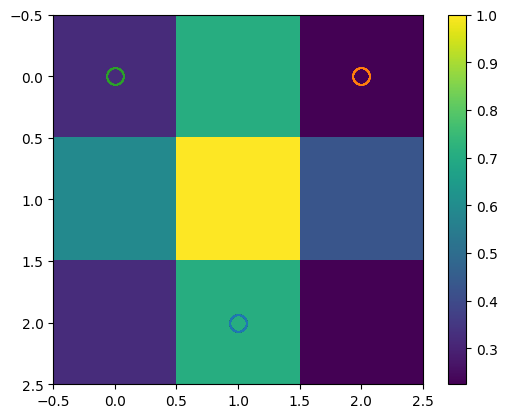

In [8]:
import matplotlib.pyplot as plt
umatrix = som.distance_map()
plt.imshow(umatrix)  # Choose your desired colormap
plt.colorbar()

markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
color_dict = {"red": 1, "green": 2, "blue": 3}
for index, point in enumerate(train_points):
    w = som.winner(point)
    plt.plot(w[0], w[1], 'o', markerfacecolor='None', markeredgecolor=colors[color_dict[train_labels[index]]-1],
             markersize=12)

plt.show()



In [13]:
w_x, w_y = zip(*[som.winner(d) for d in data])
w_x = np.array(w_x)
w_y = np.array(w_y)
print(w_x)
print(w_y)

[1 2 2 ... 0 2 1]
[2 0 0 ... 0 0 2]


[[ True False  True]
 [False  True  True]
 [ True  True False]
 ...
 [False  True  True]
 [ True False  True]
 [ True False  True]]


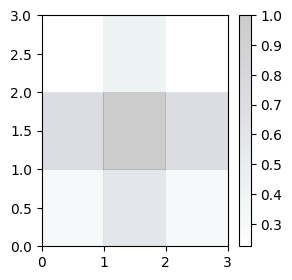

In [23]:

plt.figure(figsize=(3, 3))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(train_points):
    idx_target = train_points==c
    print(idx_target)
    break
    # plt.scatter((w_x[idx_target] + np.random.rand(np.sum(idx_target))*.8),
    #             w_y[idx_target] + (np.random.rand(np.sum(idx_target))*.8),
    #             s = 50, c = colors[c-1], label = color_dict[c])
